In [1]:
import tensorflow as tf
import numpy as np
import time
from tensorflow.keras.datasets import mnist

batch_size = 128
nH1 = 256
nH2 = 256
nH3 = 256

(x_train, y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train.astype('float32'), x_test.astype('float32')
x_train, x_test = x_train.reshape([-1, 784]), x_test.reshape([-1,784])
x_train, x_test = x_train/255, x_test/255
y_train, y_test = tf.one_hot(y_train, depth=10), tf.one_hot(y_test,depth=10)
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.shuffle(60000).batch(batch_size)

class ANN(object):
  def __init__(self):
    self.W1 = tf.Variable(tf.random.normal(shape=[784, nH1]))
    self.W2 = tf.Variable(tf.random.normal(shape=[nH1, nH2]))
    self.W3 = tf.Variable(tf.random.normal(shape=[nH2, nH3]))
    self.Wout = tf.Variable(tf.random.normal(shape=[nH3, 10]))

    self.b1 = tf.Variable(tf.random.normal(shape=[nH1]))
    self.b2 = tf.Variable(tf.random.normal(shape=[nH2]))
    self.b3 = tf.Variable(tf.random.normal(shape=[nH3]))
    self.bout = tf.Variable(tf.random.normal(shape=[10]))

  def __call__(self, x):
    H1_out = tf.nn.relu(tf.matmul(x, self.W1) + self.b1)
    H2_out = tf.nn.relu(tf.matmul(H1_out, self.W2) + self.b2)
    H3_out = tf.nn.relu(tf.matmul(H2_out, self.W3) + self.b3)

    out = tf.matmul(H3_out, self.Wout) + self.bout

    return out

ANN_model = ANN()

optimizer = tf.optimizers.Adam(0.01)

@tf.function
def accuracy(x, y):
  correct = tf.equal(tf.argmax(x, 1), tf.argmax(y, 1))
  accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

  return accuracy

@tf.function
def train_step(model, x, y):
  with tf.GradientTape() as tape:
    y_pred = model(x)
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_pred, labels=y))

  gradients = tape.gradient(loss, vars(model).values())
  optimizer.apply_gradients(zip(gradients, vars(model).values()))  #weight update

for epoch in range(101):
  avg_loss = 0
  tot_batch = int(x_train.shape[0] / batch_size)

  for batch_x, batch_y in train_data:
    train_step(ANN_model, batch_x, batch_y)
    current_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=ANN_model(batch_x), labels=batch_y))
    #current_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=ANN_model(batch_x), labels=batch_y))
  avg_loss = avg_loss + current_loss/tot_batch

  if epoch % 5 == 0:
    print("Epoch Step: %d, Loss = %f" % ((epoch), avg_loss))
    print("Accuracy of test: %f"% accuracy(ANN_model(x_test), y_test))
    print("---------------------------------------------")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch Step: 0, Loss = 0.108791
Accuracy of test: 0.920800
---------------------------------------------
Epoch Step: 5, Loss = 0.038523
Accuracy of test: 0.943100
---------------------------------------------
Epoch Step: 10, Loss = 0.002110
Accuracy of test: 0.950400
---------------------------------------------
Epoch Step: 15, Loss = 0.005618
Accuracy of test: 0.961300
---------------------------------------------
Epoch Step: 20, Loss = 0.000884
Accuracy of test: 0.958500
---------------------------------------------
Epoch Step: 25, Loss = 0.000434
Accuracy of test: 0.936000
---------------------------------------------
Epoch Step: 30, Loss = 0.000155
Accuracy of test: 0.932100
---------------------------------------------
Epoch Step: 35, Loss = 0.000596
Accuracy of test: 0.891100
---------------------------------------------
Epoch Step: 40, Loss = 0.000699
Accuracy of test: 0.857000
---------------------------------------------
Epoch 

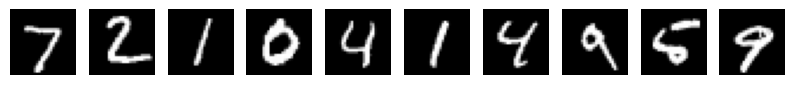

예측값: [7 2 1 0 4 1 4 2 2 9]
실제값: [7 2 1 0 4 1 4 9 5 9]


In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()

predictions = tf.argmax(ANN_model(x_test[:10]), axis=1)
actual = tf.argmax(y_test[:10], axis=1)
print("예측값:", predictions.numpy())
print("실제값:", actual.numpy())